# Automobile Price Hypothesis Testing
## Author - Trupti Gandhi

### Steps
Test hypotheses for the price of automobiles:

1. Compare and test Normality the distributions of **price** and **log price** <br/>
Use both a graphical method and a formal test. Hint: Remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a Normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


In [11]:
import plotly.plotly as py
import numpy as np
import matplotlib.pyplot as plt
from plotly.graph_objs import *
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import Subplot
import seaborn as sns

In [12]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"
Automobile = pd.read_csv(fileName, usecols=range(0,26))
Automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [13]:
Automobile.shape

(205, 26)

In [14]:
Automobile_df= Automobile.replace('[?]', np.NaN, regex = True)
print(Automobile_df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [15]:
Automobile_df= Automobile_df.dropna()

In [16]:
Automobile_df= Automobile_df.reset_index(drop=True)

In [17]:
print(Automobile_df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [18]:
Automobile_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [19]:
  Automobile_df[['normalized-losses', 'bore', 'stroke',
       'horsepower', 'peak-rpm', 'price']] = Automobile_df[['normalized-losses', 'bore', 'stroke',
       'horsepower', 'peak-rpm', 'price']].astype(float)

In [20]:
print(Automobile_df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


Compare and test Normality the distributions of price and log price 

In [21]:
Automobile_df['log_price']= np.log(Automobile_df['price'])

In [22]:
import numpy.random as nr
nr.seed(1357)
norm1 = Automobile_df['price']
norm2 = Automobile_df['log_price']

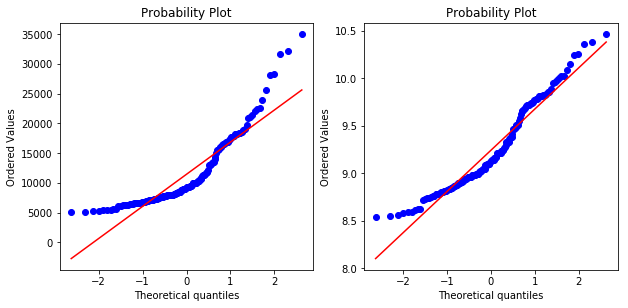

In [23]:
def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(10, 10)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2) 

 Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.
 
A normal Q–Q plot comparing randomly generated, independent standard normal data on the vertical axis to a standard normal population on the horizontal axis. The linearity of the points suggests that the data are normally distributed.
 
The curved pattern in fig. 1 st suggests that the price value are not normally distributed.
The curved pattern in fig. 2 nd suggests that the log price value is closed to normally distribution.

In [24]:
from numpy import random
import scipy.stats as ss

a = ss.normaltest(Automobile_df['price'])
print(a)
b = ss.normaltest(Automobile_df['log_price'])
print(b)

NormaltestResult(statistic=53.772062304151333, pvalue=2.1064202945306713e-12)
NormaltestResult(statistic=11.959170318658108, pvalue=0.0025298755698514989)


Text(0,0.5,'Density')

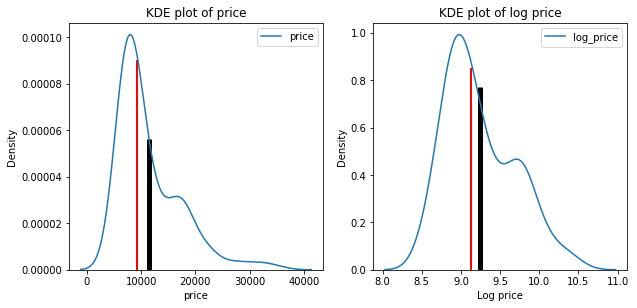

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10)).gca() # define axis
ax1 = plt.subplot(221) ## setup the left subplot
sns.kdeplot(Automobile_df.loc[:, 'price'], ax = ax1)
plt.vlines(Automobile_df.loc[:, 'price'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.000056,
           linewidth=5.0)
plt.vlines(Automobile_df.loc[:, 'price'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.00009, 
           linewidth=2.0,
           color="red")
ax1.set_title('KDE plot of price') # Give the plot a main title
ax1.set_xlabel('price') # Set text for the x axis
ax1.set_ylabel('Density')# Set text for y axis
ax1 = plt.subplot(222) ## Set up the right subplot  
sns.kdeplot(Automobile_df.loc[:, 'log_price'], ax = ax1)
plt.vlines(Automobile_df.loc[:, 'log_price'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=.77,
           linewidth=5.0)
plt.vlines(Automobile_df.loc[:, 'log_price'].median(),   # Plot red line at median
           ymin=0, 
           ymax=.85, 
           linewidth=2.0,
           color="red")
ax1.set_title('KDE plot of log price') # Give the plot a main title
ax1.set_xlabel('Log price') # Set text for the x axis
ax1.set_ylabel('Density')# Set text for y axis

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew.One more thing, The mean is also influenced heavily by outliers, while the median resists the influence of outliers.

**Part2 #**  Test significance of price (or log price) stratified by a) fuel type, b) aspiration, and c) rear vs. front wheel drive. Use both graphical methods and the formal test.

In [26]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

#### Fuel type vs Price

In [27]:
gas = Automobile_df.loc[Automobile_df.loc[:,'fuel-type']=='gas','price']
diesel = Automobile_df.loc[Automobile_df.loc[:,'fuel-type']=='diesel','price']

test_fuel = t_test(gas, diesel, alpha = 0.05)
print(test_fuel)

DegFreedom       15.050468
Difference    -5238.023611
Statistic        -3.391997
PValue            0.000878
Low95CI      -10206.501896
High95CI       -269.545326
dtype: float64


As we know if the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. If the p-value is larger than 0.05, we cannot conclude that a significant difference exists. 

The test yields a p-value of 0.000878, which means there is a .08% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would **fail to reject the null hypothesis**, since the p-value is greater than the corresponding significance level of 5%.

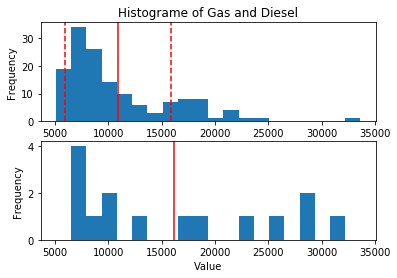

In [28]:

%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['Gas', 'Diesel'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t(gas, diesel, test_fuel)
    

Notice that the mean of the population in the lower plot are within the confidence interval of the difference of means of the population. This confirms that we **cannot reject** the null hypothesis that there is no significant difference in these means

#### Aspiration vs Price

In [29]:
Automobile_df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [30]:
std = Automobile_df.loc[Automobile_df.loc[:,'aspiration']=='std','price']
turbo = Automobile_df.loc[Automobile_df.loc[:,'aspiration']=='turbo','price']

test_aspiration = t_test(std, turbo, alpha = 0.05)
print(test_fuel)

DegFreedom       15.050468
Difference    -5238.023611
Statistic        -3.391997
PValue            0.000878
Low95CI      -10206.501896
High95CI       -269.545326
dtype: float64


As we know if the p-value is less than 0.05, we reject the null hypothesis. If we were using a 95% confidence level we would ** reject the null hypothesis** in this case , since the p-value is greater than the corresponding significance level of 5%.

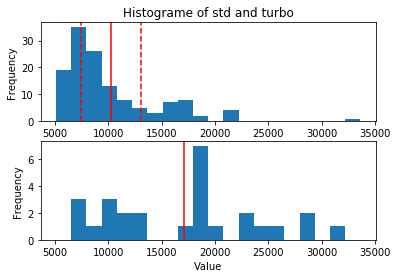

In [31]:
def plot_t(a, b, t_test, cols=['std', 'turbo'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t(std, turbo, test_aspiration)    

Notice that the mean of the population in the lower plot are not within the confidence interval of the difference of means of the population. This confirms that we **can reject the null hypothesis** that there is no significant difference in these means. 

#### drive-wheels vs price

In [32]:
Automobile_df['drive-wheels'].unique()

array(['fwd', '4wd', 'rwd'], dtype=object)

In [33]:
fwd = Automobile_df.loc[Automobile_df.loc[:,'drive-wheels']=='fwd','price']
rwd = Automobile_df.loc[Automobile_df.loc[:,'drive-wheels']=='rwd','price']

test_fuel = t_test(fwd,rwd, alpha = 0.05)
print(test_fuel)

DegFreedom    5.490245e+01
Difference   -8.858179e+03
Statistic    -1.143320e+01
PValue        3.965316e-22
Low95CI      -1.083934e+04
High95CI     -6.877018e+03
dtype: float64


As we know if the p-value is less than 0.05, we reject the null hypothesis. If we were using a 95% confidence level we would ** reject the null hypothesis** in this case , since the p-value is greater than the corresponding significance level of 5%.

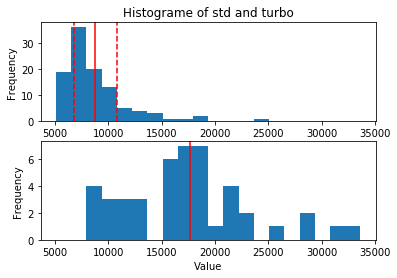

In [34]:
def plot_t(a, b, t_test, cols=['std', 'turbo'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t(fwd, rwd, test_fuel) 

Notice that the mean of the population in the lower plot are not within the confidence interval of the difference of means of the population. This confirms that we **can reject the null hypothesis** that there is no significant difference in these means. 

**Part 3 #** Apply ANOVA and Tukey's HSD test to the auto price data to compare the price (or log price if closer to a Normal distribution) of autos stratified by body style.

In [35]:
Automobile_df['body-style'].unique()

array(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'], dtype=object)

In [36]:
Automobile_df['counts'] = 1
Automobile_df.loc[:, ['body-style', 'counts']].groupby(['body-style']).agg('count')

,counts
body-style,
convertible,2
hardtop,5
hatchback,56
sedan,79
wagon,17


The ANOVA test lets us check whether a numeric response variable varies according to the levels of a categorical variable.

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

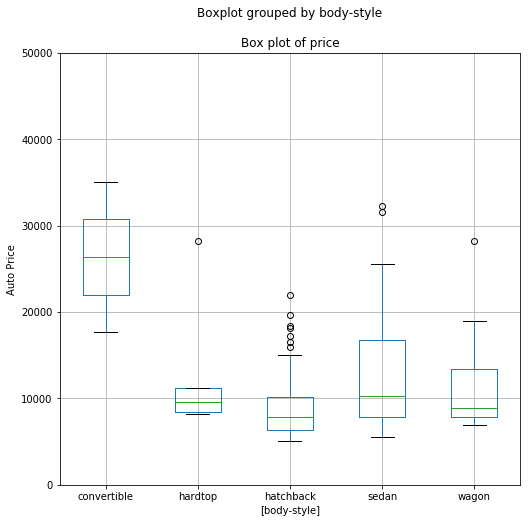

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'body-style']].boxplot(by = 'body-style', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [38]:
wagon = Automobile_df.loc[Automobile_df['body-style'] == 'wagon' , ['price']]
print (wagon)

       price
17    8921.0
25    7295.0
45   28248.0
63    7349.0
67    7999.0
72   14399.0
89    8921.0
105   7463.0
106  10198.0
107   8013.0
108  11694.0
112   6918.0
113   7898.0
114   8778.0
149  13415.0
151  16515.0
153  18950.0


In [39]:
sedan = Automobile_df.loc[Automobile_df['body-style'] == 'sedan' , ['price']]
print (sedan)

       price
0    13950.0
1    17450.0
2    17710.0
3    23875.0
4    16430.0
5    16925.0
6    20970.0
7    21105.0
10    6575.0
15    6692.0
16    7609.0
24    7295.0
28    8845.0
29   10295.0
30   12945.0
31   10345.0
32   32250.0
36    6695.0
37    7395.0
39    8495.0
41   10245.0
43   18280.0
44   25552.0
47   31600.0
55    6989.0
56    8189.0
57    9279.0
58    9279.0
59    5499.0
60    7099.0
..       ...
100   7126.0
101   7775.0
102   9960.0
103   9233.0
104  11259.0
115   6938.0
117   7898.0
119   7738.0
121   9258.0
122   8058.0
124   9298.0
132   8948.0
133  10698.0
135  10898.0
139  15690.0
140   7775.0
141   7975.0
142   7995.0
143   8195.0
144   8495.0
145   9495.0
146   9995.0
148  12940.0
150  15985.0
152  18420.0
154  16845.0
155  19045.0
156  21485.0
157  22470.0
158  22625.0

[79 rows x 1 columns]


In [40]:
hatchback = Automobile_df.loc[Automobile_df['body-style'] == 'hatchback' , ['price']]
print (hatchback)

       price
8     5151.0
9     6295.0
11    5572.0
12    6377.0
13    7957.0
14    6229.0
18   12964.0
19    6479.0
20    6855.0
21    5399.0
22    6529.0
23    7129.0
26    7895.0
27    9095.0
33    5195.0
34    6095.0
35    6795.0
38    8845.0
40   10595.0
42   11245.0
49    5389.0
50    6189.0
51    6669.0
52    7689.0
53    9959.0
54    8499.0
65    7799.0
69    8949.0
74   17199.0
75   19699.0
76   18399.0
84    5572.0
85    7957.0
86    6229.0
90   22018.0
91   11850.0
93   15040.0
95   18150.0
97    5118.0
98    7053.0
99    7603.0
109   5348.0
110   6338.0
111   6488.0
116   7198.0
118   7788.0
120   8358.0
123   8238.0
125   9538.0
128   9989.0
130  11549.0
134   9988.0
136  11248.0
137  16558.0
138  15998.0
147   9980.0


In [41]:
hardtop = Automobile_df.loc[Automobile_df['body-style'] == 'hardtop' , ['price']]
print (hardtop)

       price
46   28176.0
68    8249.0
126   8449.0
127   9639.0
129  11199.0


In [42]:
Automobile_df['body-style'].unique()

array(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'], dtype=object)

In [43]:
convertible = Automobile_df.loc[Automobile_df['body-style'] == 'convertible' , ['price']]
print (convertible)

       price
48   35056.0
131  17669.0


In [44]:
import scipy.stats as ss
f_statistic, p_value = ss.f_oneway(convertible, hardtop, hatchback, sedan, wagon)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = [ 6.95054325]
P-value = [  3.60028411e-05]


The F-Statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 5 variables have the same mean, as the probability of the differences arrising from random chance is quite low. 



#### Tukey's HSD test 

In [45]:
data =  Automobile_df[['body-style','price']]
print (data)

      body-style    price
0          sedan  13950.0
1          sedan  17450.0
2          sedan  17710.0
3          sedan  23875.0
4          sedan  16430.0
5          sedan  16925.0
6          sedan  20970.0
7          sedan  21105.0
8      hatchback   5151.0
9      hatchback   6295.0
10         sedan   6575.0
11     hatchback   5572.0
12     hatchback   6377.0
13     hatchback   7957.0
14     hatchback   6229.0
15         sedan   6692.0
16         sedan   7609.0
17         wagon   8921.0
18     hatchback  12964.0
19     hatchback   6479.0
20     hatchback   6855.0
21     hatchback   5399.0
22     hatchback   6529.0
23     hatchback   7129.0
24         sedan   7295.0
25         wagon   7295.0
26     hatchback   7895.0
27     hatchback   9095.0
28         sedan   8845.0
29         sedan  10295.0
..           ...      ...
129      hardtop  11199.0
130    hatchback  11549.0
131  convertible  17669.0
132        sedan   8948.0
133        sedan  10698.0
134    hatchback   9988.0
135        s

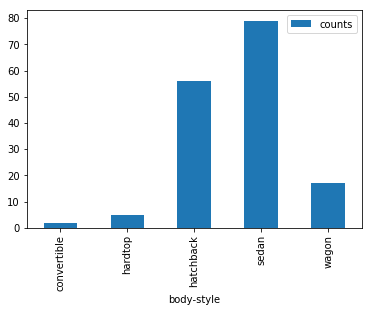

In [46]:
%matplotlib inline
Automobile_df.loc[:, ['body-style', 'counts']].groupby(['body-style']).agg('count').plot.bar()

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['body-style'],)
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)


       Multiple Comparison of Means - Tukey HSD,FWER=0.05      
   group1     group2    meandiff     lower      upper    reject
---------------------------------------------------------------
convertible  hardtop    -13220.1  -25875.4748 -564.7252   True 
convertible hatchback -17142.3393  -28027.403 -6257.2756  True 
convertible   sedan   -13803.8797 -24634.1665 -2973.593   True 
convertible   wagon   -15011.0882 -26318.5033 -3703.6732  True 
  hardtop   hatchback  -3922.2393 -10982.3562 3137.8776  False 
  hardtop     sedan    -583.7797   -7559.1471 6391.5876  False 
  hardtop     wagon    -1790.9882  -9486.3292 5904.3527  False 
 hatchback    sedan    3338.4595    696.1401   5980.779   True 
 hatchback    wagon    2131.2511   -2057.3495 6319.8516  False 
   sedan      wagon    -1207.2085  -5251.3245 2836.9075  False 
---------------------------------------------------------------
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']


group1,group2,meandiff,lower,upper,reject
convertible,hardtop,-13220.1,-25875.4748,-564.7252,True
convertible,hatchback,-17142.3393,-28027.403,-6257.2756,True
convertible,sedan,-13803.8797,-24634.1665,-2973.593,True
convertible,wagon,-15011.0882,-26318.5033,-3703.6732,True
hardtop,hatchback,-3922.2393,-10982.3562,3137.8776,False
hardtop,sedan,-583.7797,-7559.1471,6391.5876,False
hardtop,wagon,-1790.9882,-9486.3292,5904.3527,False
hatchback,sedan,3338.4595,696.1401,5980.779,True
hatchback,wagon,2131.2511,-2057.3495,6319.8516,False
sedan,wagon,-1207.2085,-5251.3245,2836.9075,False


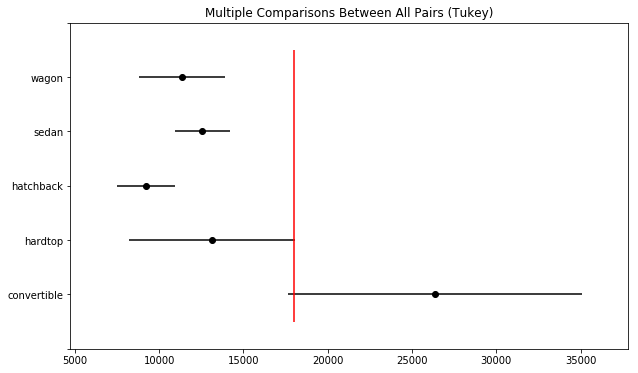

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['price'],     # Data
                          groups=data['body-style'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=18000,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()   

The output of the Tukey test shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. 

In this case, the results above reveal that convertible  significantly differs from the other four  body-styles. The last column tells us that there is significant evidence to reject the null hypothesis for 5 groups.

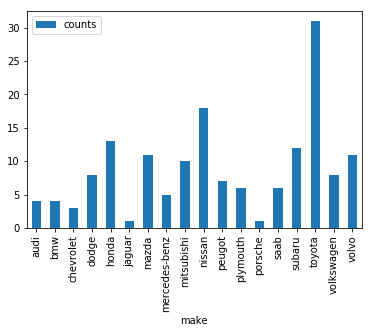

In [49]:
Automobile_df[['counts', 'make']].groupby(['make']).agg('count').plot(kind = 'bar')

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

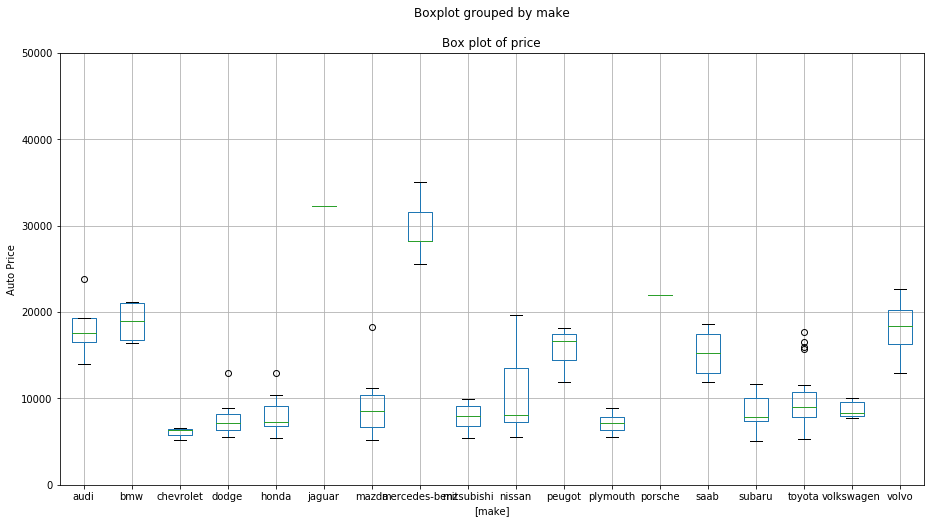

In [50]:
fig = plt.figure(figsize=(15, 8)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'make']].boxplot(by = 'make', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

group1,group2,meandiff,lower,upper,reject
audi,bmw,611.25,-6812.0345,8034.5345,False
audi,chevrolet,-12239.25,-20257.3136,-4221.1864,True
audi,dodge,-10456.125,-16884.8779,-4027.3721,True
audi,honda,-10061.5577,-16064.0815,-4059.0339,True
audi,jaguar,14003.75,2266.5067,25740.9933,True
audi,mazda,-9166.25,-15295.8254,-3036.6746,True
audi,mercedes-benz,11480.15,4437.804,18522.496,True
audi,mitsubishi,-10433.25,-16644.0154,-4222.4846,True
audi,nissan,-7830.5833,-13633.6317,-2027.5349,True
audi,peugot,-2487.6786,-9067.717,4092.3598,False


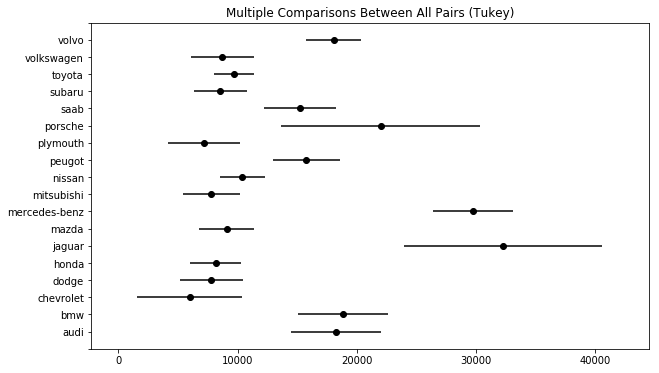

In [51]:
data =  Automobile_df[['price','make']]

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['price'],     # Data
                          groups=data['make'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()   


C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

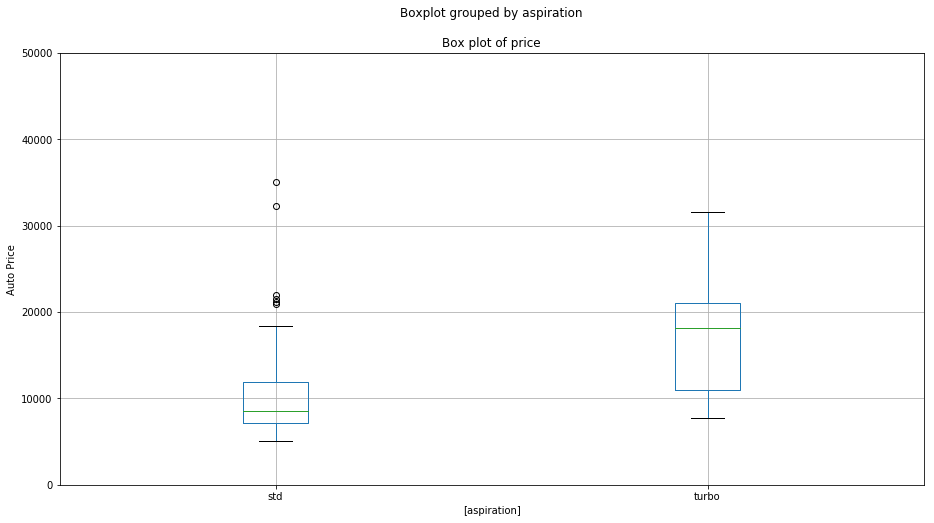

In [52]:
fig = plt.figure(figsize=(15, 8)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'aspiration']].boxplot(by = 'aspiration', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [53]:
data =  Automobile_df[['price','aspiration']]

In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['aspiration'],)
result = mc.tukeyhsd()

 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower     upper   reject
-------------------------------------------------
 std   turbo  6760.904 4543.7526 8978.0555  True 
-------------------------------------------------
['std' 'turbo']


C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

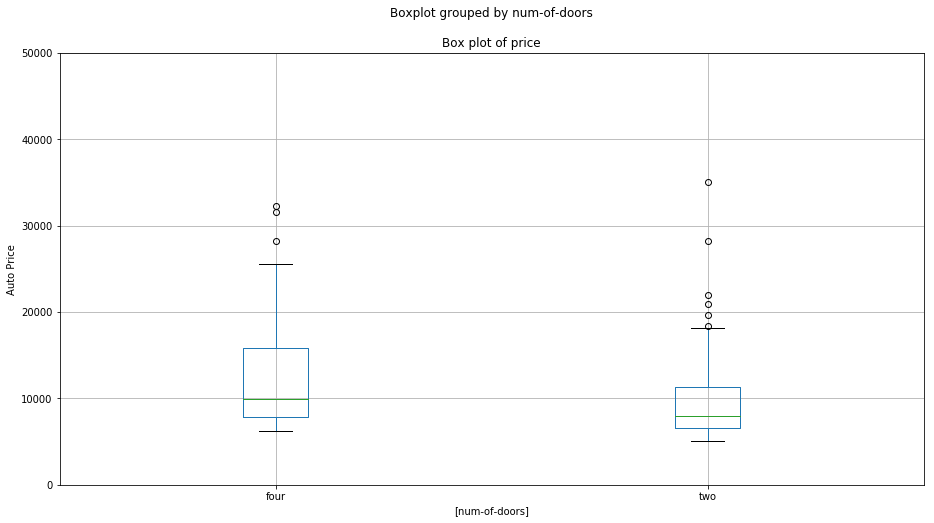

In [55]:
fig = plt.figure(figsize=(15, 8)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'num-of-doors']].boxplot(by = 'num-of-doors', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [56]:
data =  Automobile_df[['price','num-of-doors']]

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['num-of-doors'],)
result = mc.tukeyhsd()

 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower    upper  reject
------------------------------------------------
 four   two   -1937.386 -3795.906 -78.866  True 
------------------------------------------------
['four' 'two']


C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

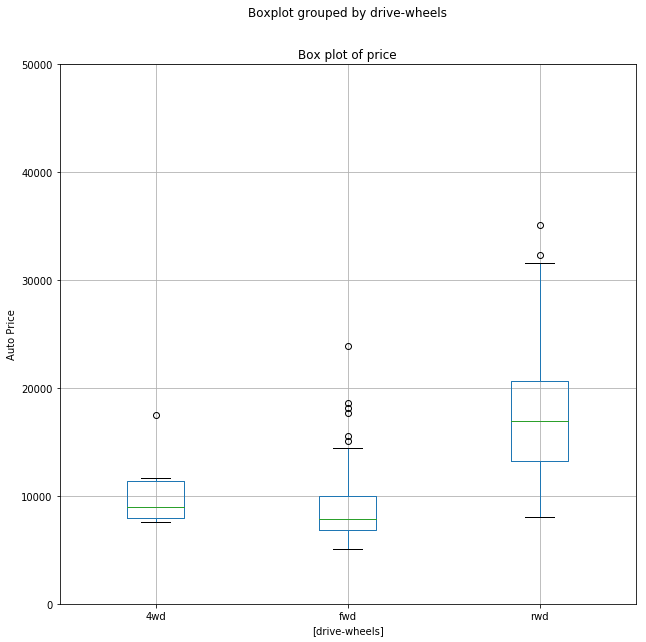

In [58]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'drive-wheels']].boxplot(by = 'drive-wheels', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [59]:
data =  Automobile_df[['price','drive-wheels']]

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['drive-wheels'],)
result = mc.tukeyhsd()

 
print(result)
print(mc.groupsunique)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
 4wd    fwd   -1429.9619 -5195.8194 2335.8956  False 
 4wd    rwd   7428.2174  3495.0967  11361.3381  True 
 fwd    rwd   8858.1793  7042.7505  10673.6081  True 
-----------------------------------------------------
['4wd' 'fwd' 'rwd']


There is not sufficient data for engine - location to proceed further. 

(0.0, 50000.0)

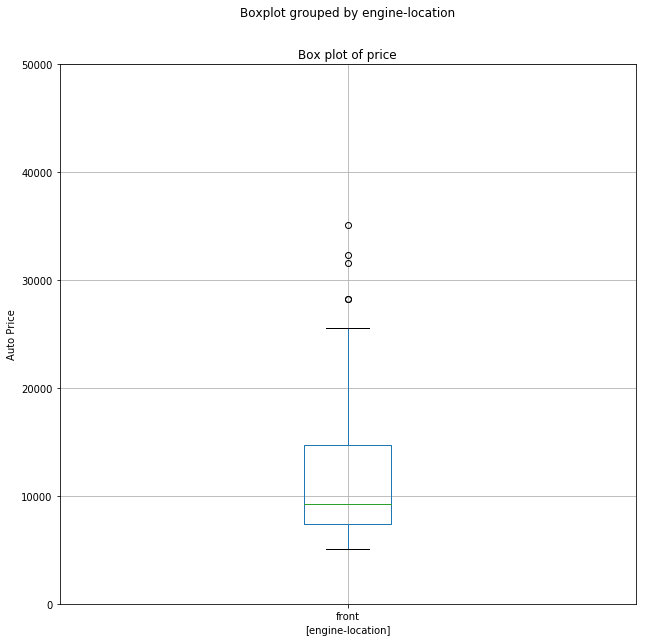

In [61]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'engine-location']].boxplot(by = 'engine-location', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

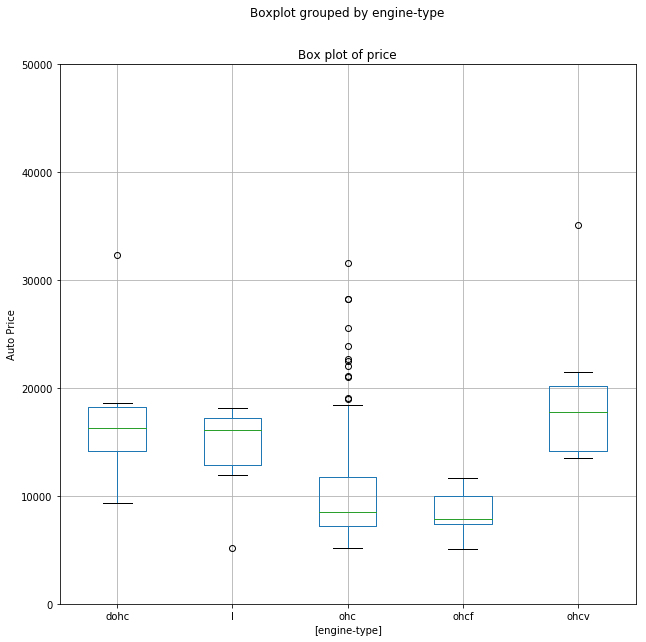

In [62]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'engine-type']].boxplot(by = 'engine-type', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [63]:
data =  Automobile_df[['price','engine-type']]

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['engine-type'],)
result = mc.tukeyhsd()

 
print(result)
print(mc.groupsunique)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2  meandiff     lower      upper    reject
------------------------------------------------------
 dohc    l    -2580.125  -10032.0243 4871.7743  False 
 dohc   ohc   -6341.3841 -11779.3324 -903.4359   True 
 dohc   ohcf   -8471.5   -15274.1222 -1668.8778  True 
 dohc   ohcv   2141.625   -5310.2743 9593.5243  False 
  l     ohc   -3761.2591  -9199.2074 1676.6891  False 
  l     ohcf  -5891.375  -12693.9972  911.2472  False 
  l     ohcv   4721.75    -2730.1493 12173.6493 False 
 ohc    ohcf  -2130.1159  -6637.4596 2377.2279  False 
 ohc    ohcv  8483.0091   3045.0609  13920.9574  True 
 ohcf   ohcv  10613.125   3810.5028  17415.7472  True 
------------------------------------------------------
['dohc' 'l' 'ohc' 'ohcf' 'ohcv']


C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

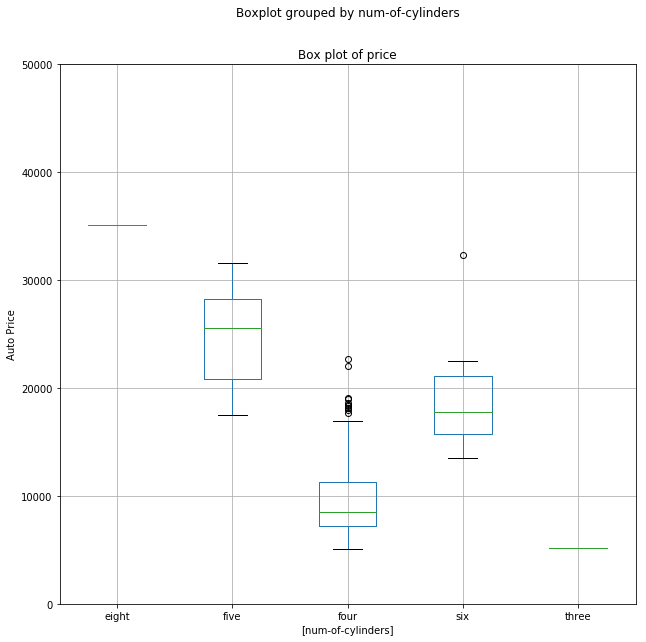

In [65]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'num-of-cylinders']].boxplot(by = 'num-of-cylinders', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [66]:
data =  Automobile_df[['price','num-of-cylinders']]

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['num-of-cylinders'],)
result = mc.tukeyhsd()

 
print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
eight   five  -10397.2857 -22403.7832  1609.2118  False 
eight   four   -25174.875  -36447.14   -13902.61   True 
eight   six   -16254.5714 -27879.8127  -4629.3302  True 
eight  three    -29905.0  -45788.1033 -14021.8967  True 
 five   four  -14777.5893 -19130.4013 -10424.7773  True 
 five   six    -5857.2857 -11056.2517  -658.3198   True 
 five  three  -19507.7143 -31514.2118  -7501.2168  True 
 four   six    8920.3036   5767.9674   12072.6397  True 
 four  three   -4730.125   -16002.39    6542.14   False 
 six   three  -13650.4286 -25275.6698  -2025.1873  True 
--------------------------------------------------------
['eight' 'five' 'four' 'six' 'three']


C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

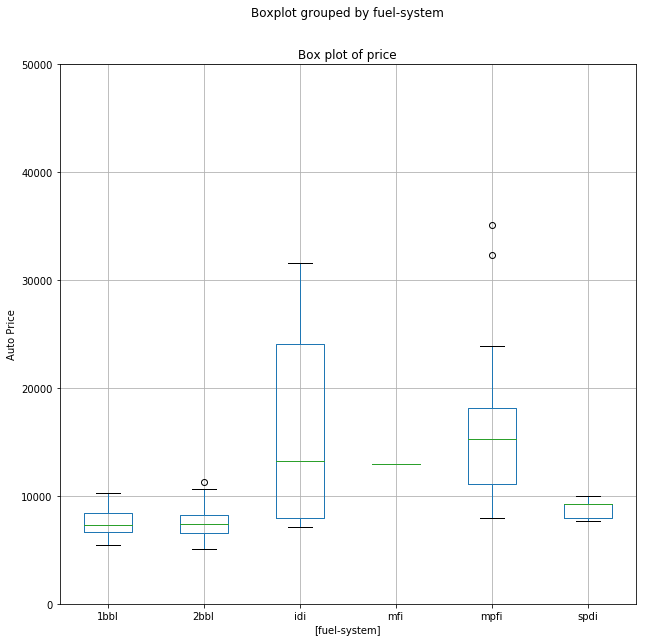

In [68]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'fuel-system']].boxplot(by = 'fuel-system', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

In [69]:
data =  Automobile_df[['price','fuel-system']]

In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['fuel-system'],)
result = mc.tukeyhsd()

 
print(result)
print(mc.groupsunique)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2  meandiff     lower      upper    reject
------------------------------------------------------
 1bbl   2bbl  -112.0534   -4318.7414 4094.6347  False 
 1bbl   idi   8634.0545   3523.8796  13744.2295  True 
 1bbl   mfi   5408.4545   -8037.3052 18854.2143 False 
 1bbl   mpfi  7567.0952   3365.2953  11768.8951  True 
 1bbl   spdi  1277.0545   -5666.3059  8220.415  False 
 2bbl   idi   8746.1079   5047.6349  12444.581   True 
 2bbl   mfi   5520.5079   -7454.594  18495.6098 False 
 2bbl   mpfi  7679.1486   5394.4302  9963.8669   True 
 2bbl   spdi  1389.1079   -4592.1185 7370.3344  False 
 idi    mfi    -3225.6    -16521.123 10069.923  False 
 idi    mpfi  -1066.9594  -4759.8717 2625.9529  False 
 idi    spdi   -7357.0   -14004.7615 -709.2385   True 
 mfi    mpfi  2158.6406  -10814.8773 15132.1586 False 
 mfi    spdi   -4131.4   -18233.4318 9970.6318  False 
 mpfi   spdi  -6290.0406 -12267.8302 -312.2511   True 
----------

Tukey's test compares the means of every treatment to the means of every other treatment; that is, it applies simultaneously to the set of all pairwise comparisons.

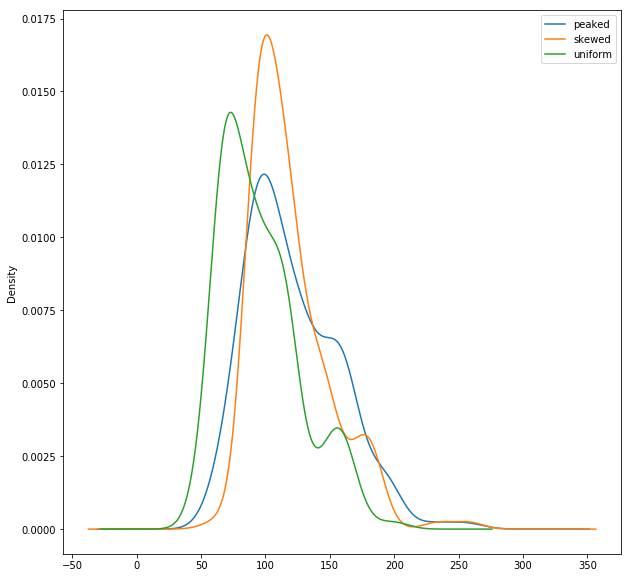

In [71]:
skewed_data =  Automobile_df['engine-size']
uniform_data = Automobile_df['horsepower']
peaked_data =  Automobile_df['normalized-losses']

data_df = pd.DataFrame({"skewed":skewed_data,
                        "uniform":uniform_data,
                       "peaked":peaked_data})

data_df.plot(kind="density",figsize=(10,10))